# Roller Coaster Data Analysis and Visualization
This project focuses on analyzing and visualizing data related to roller coasters from around the world. After cleaning and preparing the dataset, we explore key features such as the year roller coasters were introduced, their speed, and their height. Through insightful visualization.

## Step 0: Imports and Reading Data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [104]:
df = pd.read_csv("Datasets/coaster_db.csv")

## Step 1: Data Understanding
- DataFrame `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [105]:
df.shape

(1087, 56)

In [106]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [107]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [12]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [108]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Step 2: Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [109]:
# Example of dropping columns
# df.drop(["Opening date"], axis=1)

In [110]:
df = df[['coaster_name', 
    # 'Length', 'Speed', 
    'Location', 'Status', 
    # 'Opening date',
    #    'Type', 
       'Manufacturer', 
    #    'Height restriction', 'Model', 'Height',
    #    'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #    'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #    'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #    'Track layout', 'Fastrack available', 'Soft opening date.1',
    #    'Closing date', 
    #    'Opened', 
    #    'Replaced by', 'Website',
    #    'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #    'Single rider line available', 'Restraint Style',
    #    'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
       'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #    'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
        #  'height_value', 'height_unit',
           'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [111]:
df["opening_date_clean"] = pd.to_datetime(df["opening_date_clean"])

In [112]:
df["year_introduced"] = pd.to_numeric(df["year_introduced"])

In [113]:
# Rename our columns
df = df.rename(columns={"coaster_name":"Coaster_Name",
                   "year_introduced":"Year_Introduced",
                   "opening_date_clean":"Opening_Date",
                   "speed_mph":"Speed_mph",
                   "height_ft":"Height_ft",
                   "Inversions_clean":"Inversion",
                   "Gforce_clean":"Gforce"
                   })

In [114]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversion            0
Gforce             725
dtype: int64

In [115]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce


In [116]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=["Coaster_Name"])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [117]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [118]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversion', 'Gforce'],
      dtype='object')

In [119]:
df = df.loc[~df.duplicated(subset=["Coaster_Name","Location","Opening_Date"])] \
    .reset_index(drop=True).copy()

## Step 3: Feature Understanding
(Univariate analysis)
- Plotting Feature Distribution
    - Histogram
    - KDE
    - Boxplot

In [120]:
df["Year_Introduced"].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

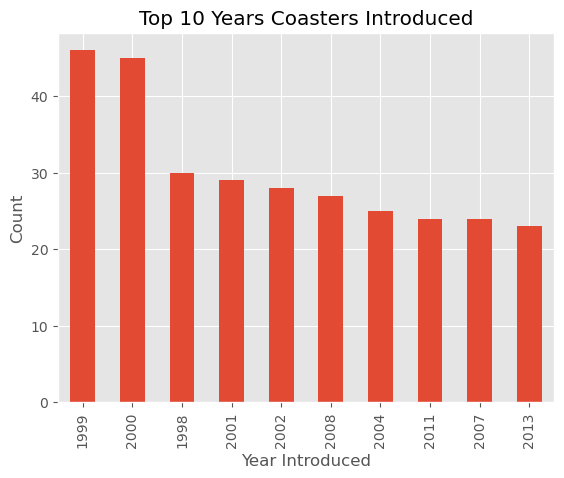

In [121]:
ax = df["Year_Introduced"].value_counts() \
    .head(10) \
    .plot(kind='bar', title="Top 10 Years Coasters Introduced")
ax.set_xlabel("Year Introduced")
ax.set_ylabel("Count")

Text(0.5, 0, 'Speed (mph)')

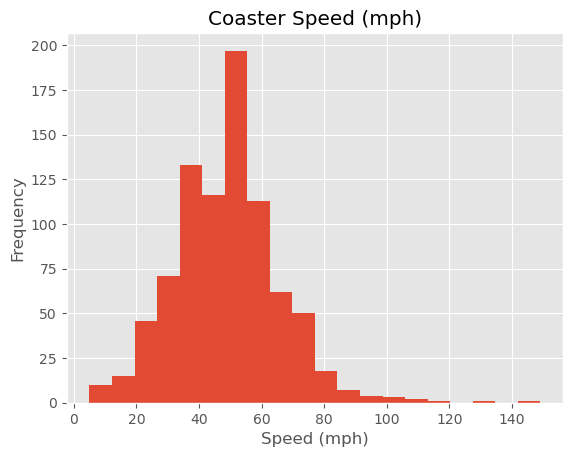

In [122]:
ax = df["Speed_mph"].plot(kind="hist",bins=20, title="Coaster Speed (mph)")
ax.set_xlabel("Speed (mph)")

Text(0.5, 0, 'Speed (mph)')

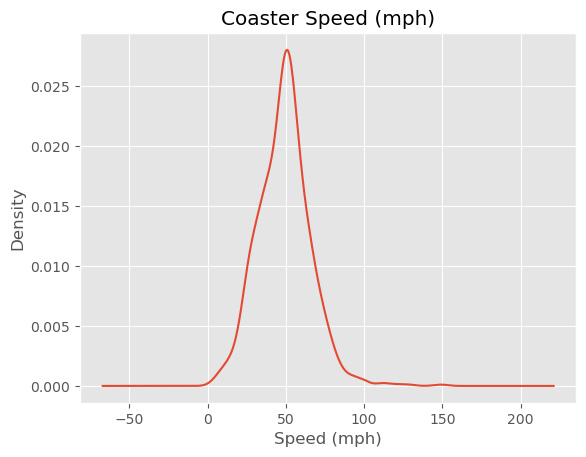

In [123]:
ax = df["Speed_mph"].plot(kind="kde", title="Coaster Speed (mph)")
ax.set_xlabel("Speed (mph)")

## Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby Comparisons

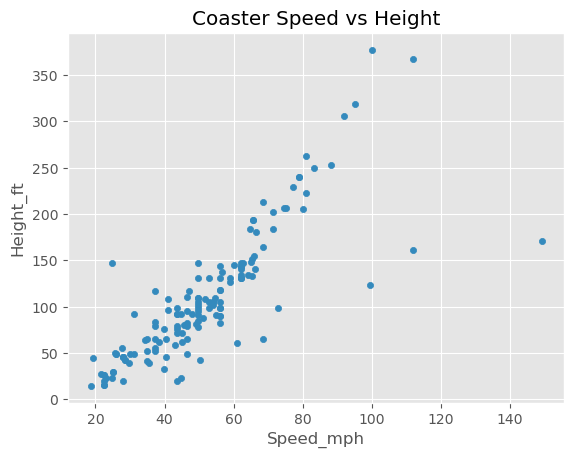

In [124]:
df.plot(kind="scatter", x = "Speed_mph", y = "Height_ft", title="Coaster Speed vs Height")
plt.show()

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

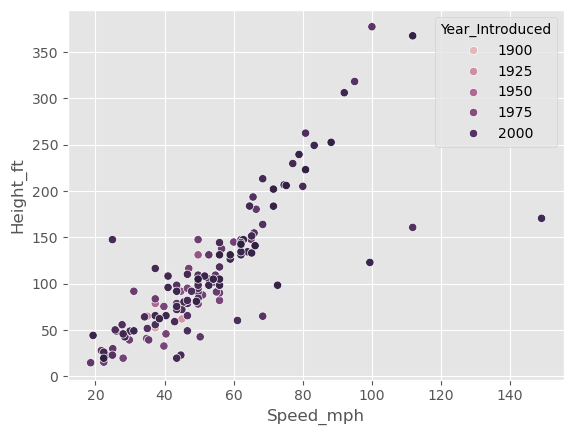

In [125]:
sns.scatterplot(x = "Speed_mph", 
                y = "Height_ft",
                hue="Year_Introduced",
                data = df
                )

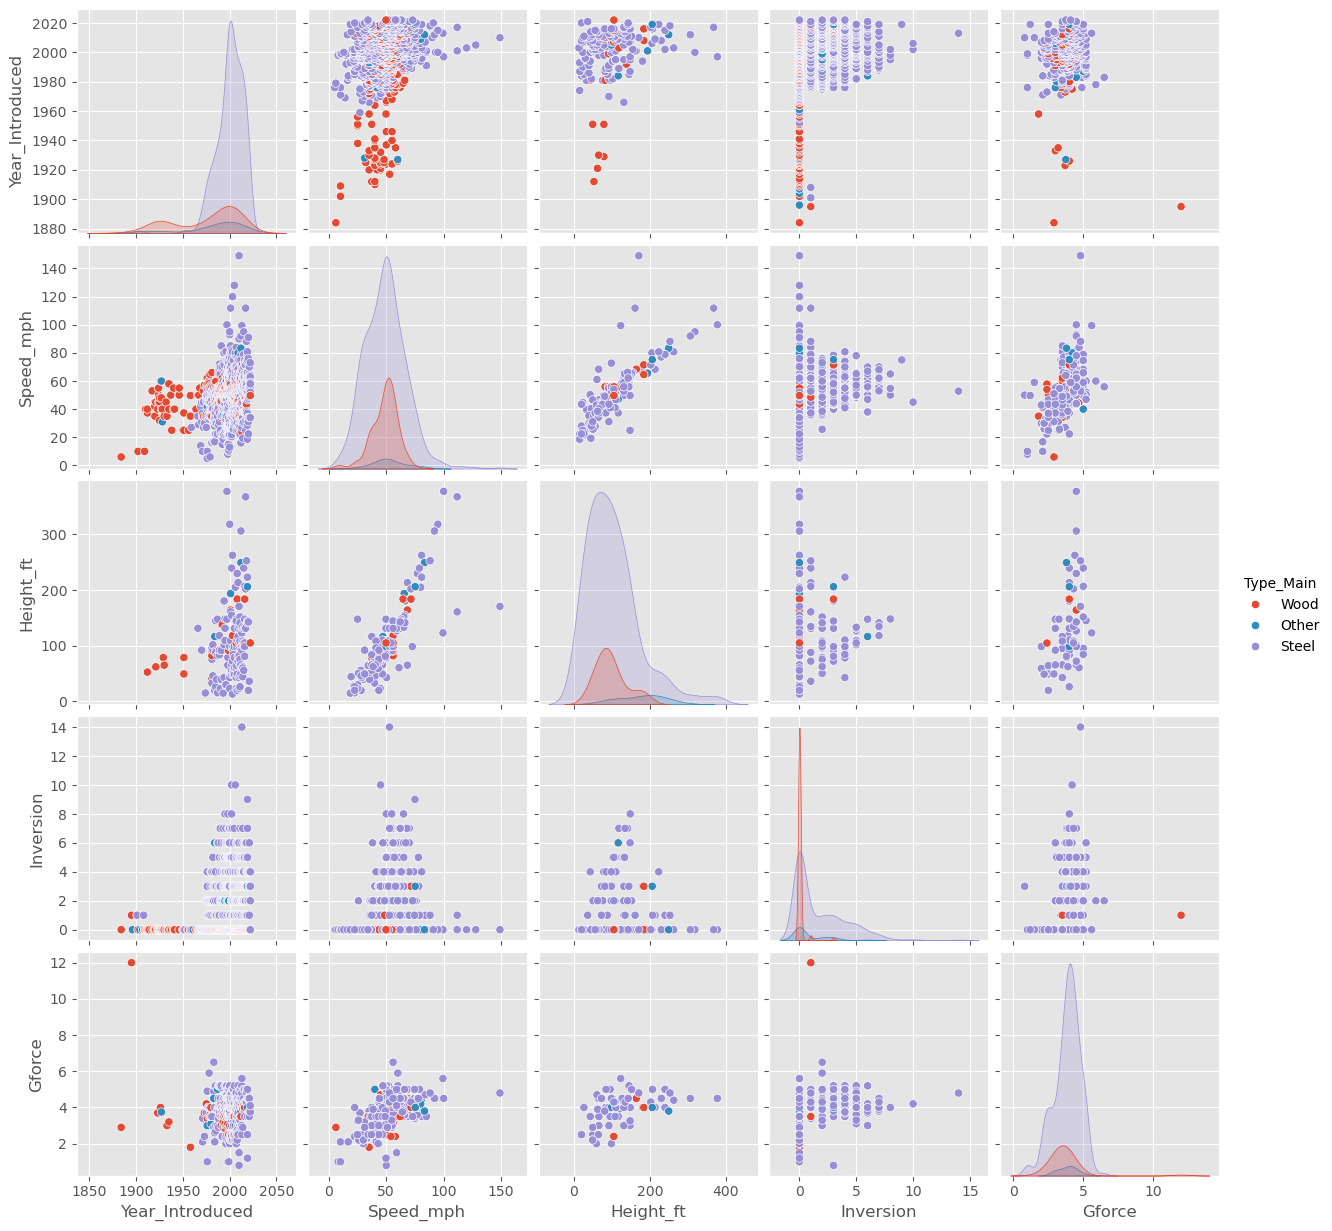

In [126]:
sns.pairplot(df, vars=["Year_Introduced","Speed_mph",
                       "Height_ft","Inversion","Gforce"],
                       hue="Type_Main")
plt.show()

In [127]:
df_corr = df[["Year_Introduced","Speed_mph",
    "Height_ft","Inversion","Gforce"]].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversion,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversion,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

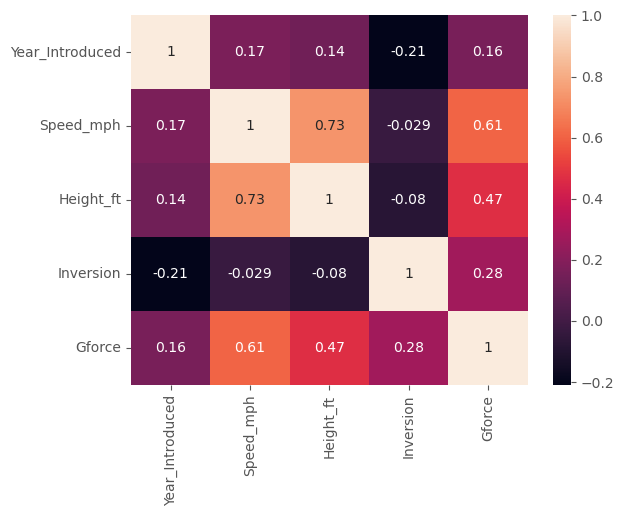

In [128]:
sns.heatmap(df_corr, annot=True)

## Step 5: Ast a Question about the data
- Try to answer a question you have about the data using a plot or statistic

Q 1: What are the locations with the fastest roller coaster (minimum of 10)?

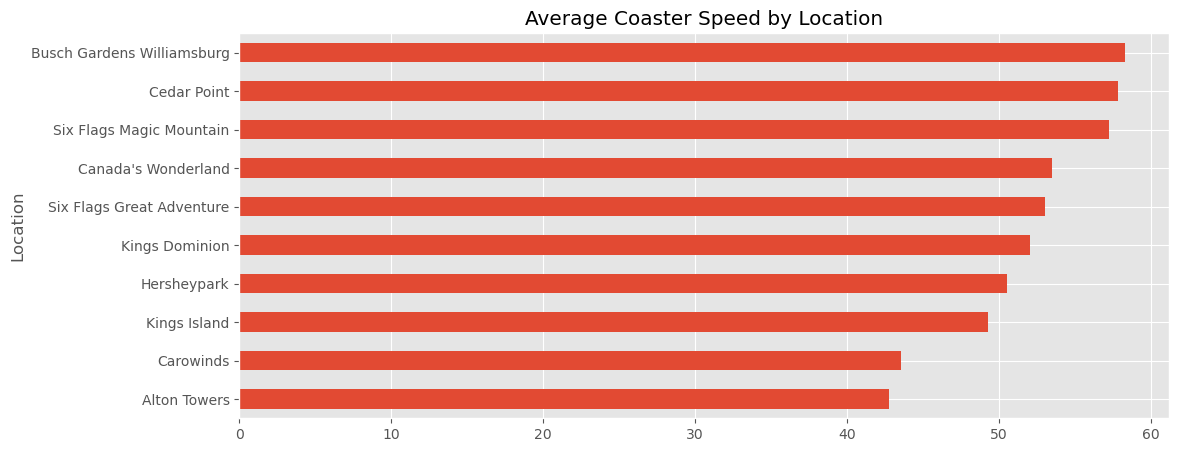

In [129]:
df.query('Location != "Other"') \
    .groupby("Location")["Speed_mph"] \
    .agg(["mean","count"]) \
    .query('count >= 10') \
    .sort_values("mean")["mean"] \
    .plot(kind="barh", figsize=(12,5), title="Average Coaster Speed by Location")
ax.set_xlabel("Average Coaster Speed")
plt.show()